In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the data

In [2]:
df = pd.read_csv('../resources/surveyResp.csv')
df.head()

,Timestamp,How old are you?,What gender do you most identify as?,What is your country of primary nationality?,What is your current country of residence?,What is your level of education?,What is your employment status?,"Do you work in the travel industry? (and if so, what sector?)",What is your relationship status?,Do you have a passport?,...,"In three or fewer words, what is your strangest souvenir?","In three of fewer words, what is your favorite/best souvenir?",What is the one item (excluding passport/money/phone/clothes/hygiene) you cannot travel without?,If you could travel to a fictional place which would you choose?,When is your next trip?,What country is your next trip to?,"In 10 words or less, what is your best travel tip?","When deciding on a trip, what is the primary deciding factor?",What would be the most important thing you would like to see change for /r/travel ?,"To exclude submissions by bots, please select ""a cruise"" from the options below."
0,19/05/2018 10:32:55,22-29,Male,United States,Germany,Master,Full-time,I do NOT work in the travel industry,Dating,Yes - valid,...,NaN,NaN,earplugs,Tar Valon,0-1 months,Czech Republic,have multiple ways to pay,Cheap transportation,The ban of poptarts,A cruise
1,21/05/2018 09:30:37,22-29,Male,Russian Federation,Russian Federation,Bachelor,Full-time,I do NOT work in the travel industry,Dating,Yes - valid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21/05/2018 09:32:02,30-40,Male,Germany,Germany,Master,Full-time,I do NOT work in the travel industry,Single,Yes - valid,...,NaN,NaN,camera,NaN,0-1 months,United Kingdom,stay flexible,Destination,fewer photos,A cruise
3,21/05/2018 09:33:49,22-29,Male,United States,United States,Bachelor,Full-time,I do NOT work in the travel industry,Single,Yes - valid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21/05/2018 09:45:10,19-21,Female,Malaysia,Malaysia,Bachelor,Unemployed,I do NOT work in the travel industry,Single,Yes - expired,...,Autumn leaves,Coins,Earphones,Elysium,0-1 months,Germany,Watch your belongings.,Destination,nothing,A cruise


I don't think that Timestamp will be the most interesting feature, there could be trends in response but they probably not meaningful ones.

### Age

In [3]:
df = df.rename(index=str, columns={'How old are you?':'age'})

In [4]:
df.shape[0] - df['age'].count()

47

In [5]:
df['age'].fillna('blank', inplace = True)

In [6]:
df['age'].unique()

array(['22-29', '30-40', '19-21', '17-18', '41-50', '65+', 'blank',
       '51-64', '0-16'], dtype=object)

In [7]:
df_age = df[['Timestamp','age']][df['age'] != 'blank'].groupby('age').count()
df_age['range'] = [17, 2, 3, 8, 11, 10, 14, 16] #Assume upper limit of 80 yrs old
df_age['mean'] = [8, 17.5, 20, 25.5, 35, 45.5, 57.5, 72.5]
df_age

,Timestamp,range,mean
age,,,
0-16,17,17,8.0
17-18,38,2,17.5
19-21,94,3,20.0
22-29,390,8,25.5
30-40,208,11,35.0
41-50,30,10,45.5
51-64,29,14,57.5
65+,5,16,72.5


In [8]:
weighted_sum = 0
for i in range(df_age.shape[0]):
    weighted_sum += df_age['mean'][i] * df_age['Timestamp'][i]
weighted_sum / df_age['Timestamp'].sum()

28.731196054254006

<BarContainer object of 8 artists>

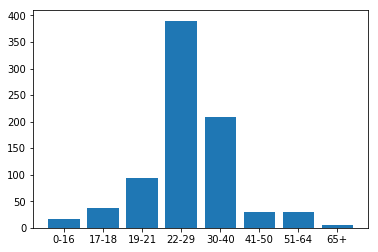

In [9]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.bar(df_age.index, df_age['Timestamp'])

This is most definitely a reddit survey! Now that I think about it you might expect to see different results splitting age into 17-18, 19-21 because of different responsibilities and greater freedom of movement. Within a couple of year you become able to travel alone, start college, maybe get a car.

### Age

In [10]:
df = df.rename(index=str, columns={'What gender do you most identify as?': 'gender'})

In [11]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

From the phrasing of the question I would expect this to have offered non-binary options. This is my first time seeing the results of one of these questions but I suppose it's not so strange that all respondents would pick a binary option.

In [12]:
df.shape[0] - df['gender'].count()

0

In [13]:
df[['Timestamp', 'gender']].groupby('gender').count()

,Timestamp
gender,
Female,321
Male,537


In [14]:
df[['Timestamp', 'gender']].groupby('gender').count() / df.shape[0]

,Timestamp
gender,
Female,0.374126
Male,0.625874


The gender ratio is not as disparate as I might have guessed, that's neat. I still don't expect any results to be representative of a significant population, but there might be good representation of the subreddit's population.

### Nationality

In [15]:
df.rename(index=str, columns = {'What is your country of primary nationality?': 'nationality'}, inplace = True)

In [16]:
df.shape[0] - df['nationality'].count()

3

In [17]:
df['nationality'].fillna('blank', inplace = True)

In [18]:
df['nationality'].unique()

array(['United States', 'Russian Federation', 'Germany', 'Malaysia',
       'United Kingdom', 'India', 'Switzerland', 'Australia', 'Canada',
       'Finland', 'Austria', 'Mauritius', 'Netherlands', 'Belgium',
       'France', 'Philippines', 'Portugal', 'Argentina', 'Romania',
       'Italy', 'Estonia', 'Chile', 'South Africa', 'Ireland {Republic}',
       'Guyana', 'Denmark', 'Poland', 'Croatia', 'New Zealand', 'Lebanon',
       'Singapore', 'Slovenia', 'Micronesia', 'Indonesia', 'Norway',
       'Mexico', 'Guatemala', 'Hungary', 'Sweden', 'Albania',
       'Korea South', 'Ukraine', 'Turkey', 'Luxembourg', 'blank',
       'Afghanistan', 'China', 'Malta', 'Spain', 'Brazil', 'Iceland',
       'Nepal', 'Lithuania', 'United Arab Emirates', 'Bangladesh',
       'Saudi Arabia', 'Colombia', 'Czech Republic', 'Tunisia', 'Cuba',
       'Israel', 'Iran', 'Taiwan', 'Bulgaria', 'Trinidad & Tobago',
       'Greece', 'Serbia'], dtype=object)

In [19]:
len(df['nationality'].unique())

67

That's a good number of countries! How Western-centric is the survey?

In [20]:
df_nationality = df[['Timestamp', 'nationality']].groupby('nationality').count()
df_nationality[df_nationality['Timestamp'] > 10]

,Timestamp
nationality,
Australia,34
Canada,78
Germany,22
India,21
Ireland {Republic},12
Netherlands,25
Sweden,12
United Kingdom,60
United States,428


In [21]:
df_nationality = df[['Timestamp', 'nationality']].groupby('nationality').count() / df.shape[0]
df_nationality.sort_values(by = 'Timestamp', ascending = False).head(10)

,Timestamp
nationality,
United States,0.498834
Canada,0.090909
United Kingdom,0.069930
Australia,0.039627
Netherlands,0.029138
Germany,0.025641
India,0.024476
Ireland {Republic},0.013986
Sweden,0.013986


The most popular nationalities are the usual suspects (US, UK, Canada), but there are more Indian and Dutch than I would have guessed.

### Residence

Will this vary much from the nationality feature?

In [22]:
df.rename(index=str, columns={'What is your current country of residence?':'residence'}, inplace = True)

In [23]:
df.shape[0] - df['residence'].count()

18

In [24]:
df['residence'].fillna('blank', inplace = True)

In [25]:
df['residence'].unique()

array(['Germany', 'Russian Federation', 'United States', 'Malaysia',
       'United Kingdom', 'United Arab Emirates', 'Switzerland',
       'Australia', 'Canada', 'Finland', 'Austria', 'India',
       'Netherlands', 'Belgium', 'France', 'Korea South', 'Philippines',
       'Portugal', 'blank', 'Argentina', 'Romania', 'Vietnam', 'Italy',
       'Estonia', 'Chile', 'South Africa', 'Mexico', 'Slovenia',
       'Ireland {Republic}', 'Denmark', 'Poland', 'Croatia',
       'New Zealand', 'Singapore', 'Indonesia', 'Sweden', 'Norway',
       'Georgia', 'Spain', 'Hungary', 'Lesotho', 'China', 'Japan',
       'Bulgaria', 'Ukraine', 'Turkey', 'Luxembourg', 'Afghanistan',
       'Israel', 'Belarus', 'Brazil', 'Iceland', 'Nepal', 'Lithuania',
       'Saudi Arabia', 'Taiwan', 'Kenya', 'Czech Republic', 'Pakistan',
       'Bangladesh', 'Iran', 'Kazakhstan'], dtype=object)

In [26]:
len(df['residence'].unique())

62

In [27]:
df_residence = df[['Timestamp', 'residence']].groupby('residence').count()
df_residence[df_residence['Timestamp'] > 10]

,Timestamp
residence,
Australia,35
Canada,70
Germany,29
Netherlands,29
Sweden,13
United Kingdom,66
United States,405
blank,18


India and Ireland don't make this list, but otherwise it's very similar.

### Education

In [28]:
df.rename(index=str, columns={'What is your level of education?': 'education'}, inplace = True)

In [29]:
df.shape[0] - df['education'].count()

22

Non-decreasing

In [30]:
df['education'].fillna('blank', inplace = True)

In [31]:
df['education'].unique()

array(['Master', 'Bachelor', 'Doctorate / PhD', 'College / Tradeschool',
       'Highschool', 'blank'], dtype=object)

In [32]:
df_edu = df[['Timestamp', 'education']].groupby('education').count()
df_edu = df_edu.reindex(['Highschool', 'College / Tradeschool', 'Bachelor', 'Master', 'Doctorate / PhD', 'blank'])
df_edu

,Timestamp
education,
Highschool,102
College / Tradeschool,157
Bachelor,373
Master,162
Doctorate / PhD,42
blank,22


<BarContainer object of 6 artists>

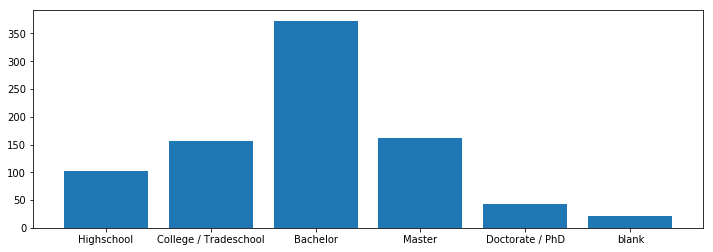

In [33]:
fig = plt.figure(figsize = (12, 4))
axs = fig.add_subplot(111)
axs.bar(df_edu.index, df_edu['Timestamp'])

I could find the number of people who did not attend college in concert with the age feature, or look for any 15yo PhDs, but that doesn't seem very interesting.

### Employment

In [34]:
df.rename(index=str, columns={'What is your employment status?': 'employment'}, inplace = True)

In [35]:
df.shape[0] - df['employment'].count()

4

Fewer missing values than in education, my pet hypothesis that more people would drop out at each question is disproved. It might be interesting to plot the number of missing values for each question.

In [36]:
df['employment'].fillna('blank', inplace = True)

In [37]:
df['employment'].unique()

array(['Full-time', 'Unemployed', 'Part-time', 'Retired', 'blank'],
      dtype=object)

In [38]:
df[['Timestamp', 'employment']].groupby('employment').count()

,Timestamp
employment,
Full-time,565
Part-time,144
Retired,20
Unemployed,125
blank,4


Are students considered unemployed or full-time?

In [39]:
df[['Timestamp', 'age', 'employment']].groupby(['employment', 'age']).count()

Timestamp
employment age             
Full-time  17-18          5
           19-21         24
           22-29        287
           30-40        177
           41-50         20
           51-64         20
           65+            1
           blank         31
Part-time  0-16           3
           17-18         17
           19-21         37
           22-29         58
           30-40         14
           41-50          5
           51-64          1
           blank          9
Retired    30-40          7
           51-64          8
           65+            3
           blank          2
Unemployed 0-16          14
           17-18         16
           19-21         33
           22-29         44
           30-40          8
           41-50          5
           blank          5
blank      22-29          1
           30-40          2
           65+            1

In [40]:
df[['Timestamp', 'age', 'employment']].groupby(['age', 'employment']).count()

Timestamp
age   employment           
0-16  Part-time           3
      Unemployed         14
17-18 Full-time           5
      Part-time          17
      Unemployed         16
19-21 Full-time          24
      Part-time          37
      Unemployed         33
22-29 Full-time         287
      Part-time          58
      Unemployed         44
      blank               1
30-40 Full-time         177
      Part-time          14
      Retired             7
      Unemployed          8
      blank               2
41-50 Full-time          20
      Part-time           5
      Unemployed          5
51-64 Full-time          20
      Part-time           1
      Retired             8
65+   Full-time           1
      Retired             3
      blank               1
blank Full-time          31
      Part-time           9
      Retired             2
      Unemployed          5

There are 7 retiress in their 30s!  
A bunch of teens chose part-time instead of unemployed.

### Trips per year

In [41]:
df.rename(index=str, columns={'On average, how many trips per year do you take?': 'trips_per_year'}, inplace = True)

In [42]:
df.shape[0] - df['trips_per_year'].count()

8

In [43]:
df['trips_per_year'].fillna(0, inplace = True)

In [44]:
df['trips_per_year'] = pd.to_numeric(df['trips_per_year'])

In [45]:
df['trips_per_year'].describe()

count    858.000000
mean       4.620047
std        5.487031
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       60.000000
Name: trips_per_year, dtype: float64

60 trips in a year! These folks travel, who would've guessed!

(array([105., 386., 210.,  48.,  20.,  32.,  13.,  10.,   0.,   0.,  15.,
          0.,   5.,   1.,   0.,   7.,   0.,   2.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58., 60.]),
 <a list of 30 Patch objects>)

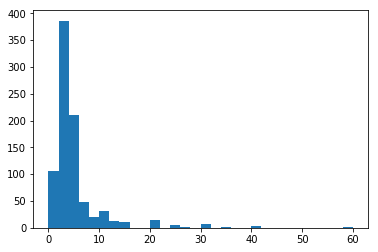

In [46]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df['trips_per_year'], bins = 30)

/home/eric/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


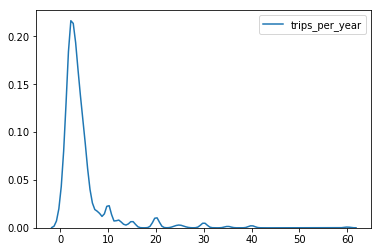

In [47]:
sns.kdeplot(df['trips_per_year'])

There are a few little peaks at 10, 20, 30, people are probably rounding off the number of trips they've taken.

### Days per year

In [48]:
df.rename(index=str, columns={'On average, how many days per year do you travel?': 'days_per_year'}, inplace = True)

In [49]:
df.shape[0] - df['days_per_year'].count()

10

In [50]:
df['days_per_year'].fillna(0, inplace = True)

(array([ 68., 128., 213.,  81., 173.,  51.,  48.,   4.,  24.,   6.,   5.,
          3.,  13.,  13.,   0.,   0.,   4.,   2.,   0.,   1.,   5.,   1.,
          0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   4.]),
 array([  0. ,   7.3,  14.6,  21.9,  29.2,  36.5,  43.8,  51.1,  58.4,
         65.7,  73. ,  80.3,  87.6,  94.9, 102.2, 109.5, 116.8, 124.1,
        131.4, 138.7, 146. , 153.3, 160.6, 167.9, 175.2, 182.5, 189.8,
        197.1, 204.4, 211.7, 219. , 226.3, 233.6, 240.9, 248.2, 255.5,
        262.8, 270.1, 277.4, 284.7, 292. , 299.3, 306.6, 313.9, 321.2,
        328.5, 335.8, 343.1, 350.4, 357.7, 365. ]),
 <a list of 50 Patch objects>)

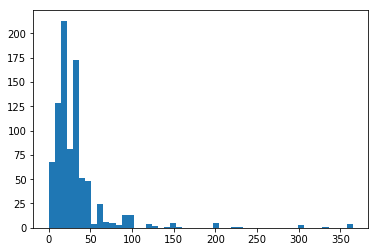

In [51]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df['days_per_year'], bins = 50)

/home/eric/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


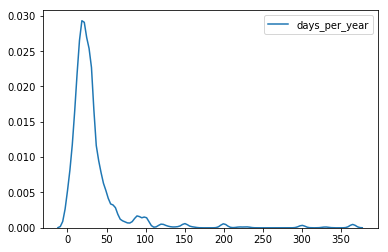

In [52]:
sns.kdeplot(df['days_per_year'])

In [53]:
df['Timestamp'][df['days_per_year'] == 365].count()

4

Again people are rounding, at 50, 100, 200. Four people travelled 365 days!

### Business days

In [54]:
df.rename(index=str, columns={'On average, how many of your travel days per year are for business? ': 'bus_days'}, inplace = True)

In [55]:
df.shape[0] - df['bus_days'].count()

16

In [56]:
df['bus_days'].fillna(0, inplace = True)

In [57]:
df['bus_days'].describe()

count    858.000000
mean       5.377622
std       20.510681
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max      300.000000
Name: bus_days, dtype: float64

Most people are not travelling for business

/home/eric/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


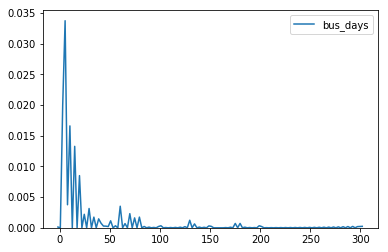

In [58]:
sns.kdeplot(df['bus_days'])

There is probably a bit of rounding but most people chose a low number or zero.

### Money spent

In [59]:
df.rename(index=str, columns={'On average, how much money do spend on average per year for travel (including all costs)?':'money_spent'}, inplace=True)

In [60]:
df.shape[0] - df['money_spent'].count()

78

Were people uncomfortable answering a question about money?  
Now I'm rethinking how interesting it would be to look at how many missing values there are for each question...

In [61]:
df['money_spent'].fillna(0, inplace = True)

This imputation with zero will sway averages, but it makes it so much easier to look at the column so I'll just try to remember the treatment and exclude missin gvalues from a potential rigorous numerical analysis.

In [62]:
df['money_spent'].describe()

count       858.000000
mean       6392.304196
std       20774.827448
min           0.000000
25%        1500.000000
50%        3000.000000
75%        6000.000000
max      450000.000000
Name: money_spent, dtype: float64

(array([703., 111.,  19.,  10.,   5.,   4.,   1.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([     0.,   9000.,  18000.,  27000.,  36000.,  45000.,  54000.,
         63000.,  72000.,  81000.,  90000.,  99000., 108000., 117000.,
        126000., 135000., 144000., 153000., 162000., 171000., 180000.,
        189000., 198000., 207000., 216000., 225000., 234000., 243000.,
        252000., 261000., 270000., 279000., 288000., 297000., 306000.,
        315000., 324000., 333000., 342000., 351000., 360000., 369000.,
        378000., 387000., 396000., 405000., 414000., 423000., 432000.,
        441000., 450000.]),
 <a list of 50 Patch objects>)

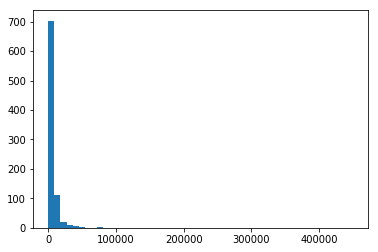

In [63]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df['money_spent'], bins = 50)

The outlier max value is making this indecipherable.

(array([236., 198.,  74., 159.,  25.,  14.,  69.,   7.,   3.,  28.,   1.,
          0.,  16.,   0.,   0.,   3.,   0.,   0.,   8.,   0.,   2.,   0.,
          1.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([    0.,  1600.,  3200.,  4800.,  6400.,  8000.,  9600., 11200.,
        12800., 14400., 16000., 17600., 19200., 20800., 22400., 24000.,
        25600., 27200., 28800., 30400., 32000., 33600., 35200., 36800.,
        38400., 40000., 41600., 43200., 44800., 46400., 48000., 49600.,
        51200., 52800., 54400., 56000., 57600., 59200., 60800., 62400.,
        64000., 65600., 67200., 68800., 70400., 72000., 73600., 75200.,
        76800., 78400., 80000.]),
 <a list of 50 Patch objects>)

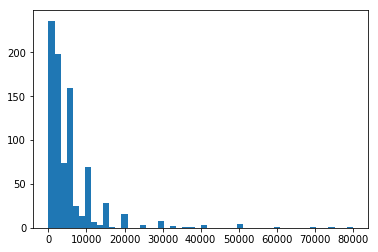

In [64]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df['money_spent'][df['money_spent'] < 100000], bins = 50)

Again people are rounding for convenience.

(array([ 92.,  16.,  23.,   9.,   7.,  44.,  10.,  35.,   3.,   0.,  73.,
          1.,  37.,   2.,   0.,  82.,   0.,  10.,   1.,   0.,  59.,   0.,
          3.,   1.,   0., 118.,   0.,   0.,   0.,   0.,  41.,   0.,   2.,
          0.,   0.,  20.,   0.,   3.,   0.,   0.,  10.,   0.,   0.,   0.,
          1.,   3.,   0.,   0.,   0.,  69.]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.,  7000.,  7200.,  7400.,  7600.,  7800.,
         8000.,  8200.,  8400.,  8600.,  8800.,  9000.,  9200.,  9400.,
         9600.,  9800., 10000.]),
 <a list of 50 Patch objects>)

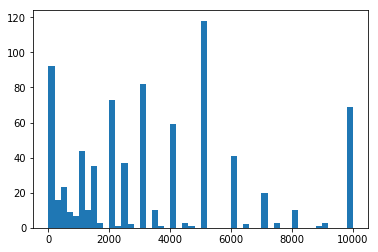

In [65]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df['money_spent'][df['money_spent'] <= 10000], bins = 50)

**Note** 78 of the zero bin were imputed missing values

Are the people who travel the most spending the most?

/home/eric/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


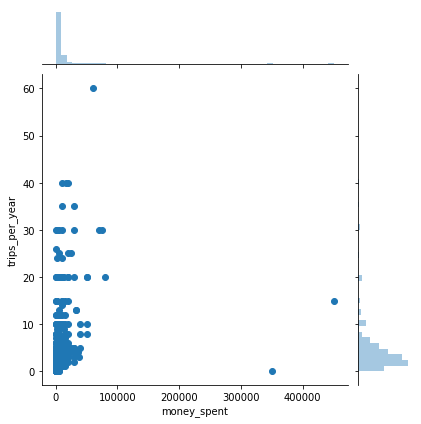

In [66]:
sns.jointplot(df['money_spent'], df['trips_per_year'])

/home/eric/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


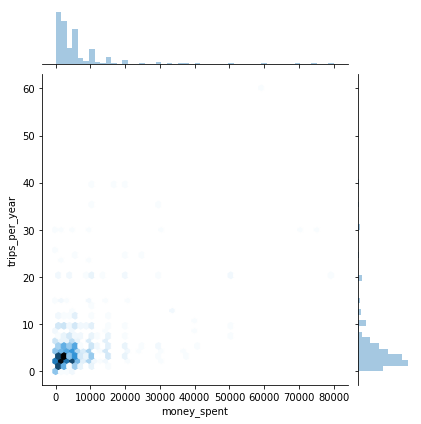

In [67]:
df_plot = df[df['money_spent'] <= 100000]
sns.jointplot(df_plot['money_spent'], df_plot['trips_per_year'], kind = 'hex')

/home/eric/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


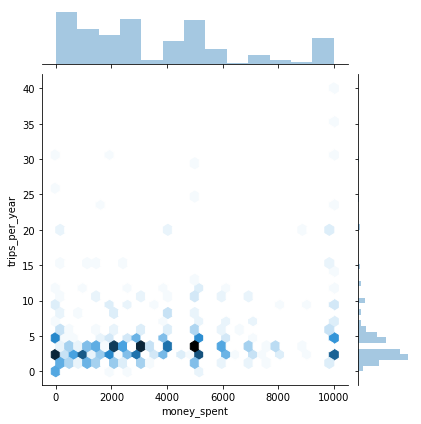

In [68]:
df_plotp = df[df['money_spent'] <= 10000]
sns.jointplot(df_plotp['money_spent'], df_plotp['trips_per_year'], kind = 'hex')

There is less variation in days per year than in money spent, with the restrictions in place.

### Meals

In [69]:
df.rename(index=str, columns = {'On average, how many meals a day do you eat out while traveling?': 'meals'}, inplace = True)

In [70]:
df.shape[0] - df['meals'].count()

14

In [71]:
df['meals'].fillna('0-24%', inplace = True)

In [72]:
df['meals'].describe()

count         858
unique          4
top       75-100%
freq          372
Name: meals, dtype: object

In [73]:
df['meals'].unique()

array(['25-49%', '0-24%', '75-100%', '50-74%'], dtype=object)

In [74]:
df[['Timestamp', 'meals']].groupby('meals').count()

,Timestamp
meals,
0-24%,72
25-49%,128
50-74%,286
75-100%,372


### Motivation

In [75]:
df.rename(index=str, columns = {'What motivates you to travel?':'motivation'}, inplace = True)

In [76]:
df.shape[0] - df['motivation'].count()

109

In [77]:
df['motivation'].fillna('None', inplace = True)

In [78]:
df['motivation_word_count'] = df['motivation'].apply(lambda x: len(x.split()))

In [79]:
df[['motivation', 'motivation_word_count']].head()

,motivation,motivation_word_count
0,None,1
1,None,1
2,Inspiration and getting out of your comfort zone,8
3,None,1
4,Exploring cultures,2


In [80]:
df['motivation_word_count'].describe()

count    858.000000
mean       3.954545
std        4.655109
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       67.000000
Name: motivation_word_count, dtype: float64

In [81]:
pd.set_option('max_colwidth', 1000)

In [82]:
df['motivation'][df['motivation_word_count'] == 67]

14     can't think of anything that excites a greater sense of childlike wonder than to be in a country where you are ignorant of almost everything. Suddenly you are five years old again. You can't read anything, you have only the most rudimentary sense of how things work, you can't even reliably cross a street without endangering your life. Your whole existence becomes a series of interesting guesses.” 
Name: motivation, dtype: object

This person took a moment to answer the question

In [83]:
df[['motivation', 'motivation_word_count']].sort_values('motivation_word_count', ascending = False)[:10]

,motivation,motivation_word_count
14,"can't think of anything that excites a greater sense of childlike wonder than to be in a country where you are ignorant of almost everything. Suddenly you are five years old again. You can't read anything, you have only the most rudimentary sense of how things work, you can't even reliably cross a street without endangering your life. Your whole existence becomes a series of interesting guesses.”",67
676,"Seeing how people lead different lives and how people can be different but also the same regardless of where we are from, expanding my mind, getting into crazy situations I would never get into at home, art, and food",39
555,"The prospect of getting out of the daily grind, eating great food, taking time to just do things I enjoy (but wouldn't necessarily take/find time to do at home), learning new things",32
10,"To see what the world has to offer, every single different aspect of every culture, country and continent. Just wanna know how thwe world works and looks in every different place.",31
294,"It makes me feel alive. I love seeing new places, landscapes, nature, history, culture. My goal in life is to see as much of this world as I can :)",30
561,desire to be in a stranger in a new area and learn about the new location and about others and see the similarities I share with these people,28
343,"Moving from the US, India hit me square in the face. It was an exhilarating experience. And got me hooked to the feeling. This addiction motivates me.",27
113,"I want to see the landscapes around the world that I don't get to see at home. I'm from Ohio, so I don't see much extreme landscape.",27
579,Shaking up my daily routine and trying something new; relaxing and taking a break from work; meeting new people and eating delicious food,23
203,"Cheaper than where I was living, the world is a big place and I want to see what's there",19


The coherence of the first observation doesn't carry through to all of the responses, but there are some complete ideas in here

In [84]:
df['motivation_char_count'] = df['motivation'].str.len()

In [85]:
df['motivation_char_count'].describe()

count    858.000000
mean      24.545455
std       26.678927
min        3.000000
25%        9.000000
50%       17.000000
75%       32.000000
max      401.000000
Name: motivation_char_count, dtype: float64

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/eric/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


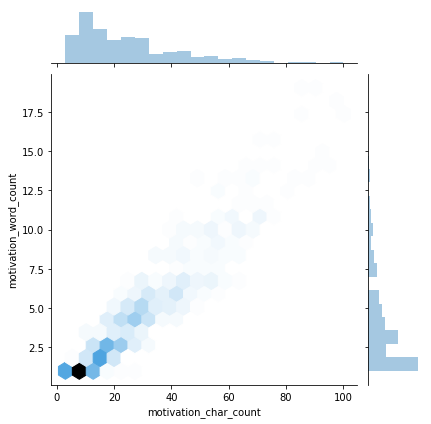

In [86]:
df_motivation = df[df['motivation_char_count'] <= 100][df['motivation_word_count'] <= 20][df['motivation'] != 'None']
sns.jointplot(df_motivation['motivation_char_count'], df_motivation['motivation_word_count'], kind = 'hex')

Not everyone gave a single-word answer!

In [87]:
def avg_length(sentence):
    words = sentence.split()
    return sum([len(word) for word in words]) / len(words)
df['motivation_avg_word_len'] = df['motivation'].apply(avg_length)

In [88]:
df[['motivation', 'motivation_avg_word_len']].head()

,motivation,motivation_avg_word_len
0,None,4.000
1,None,4.000
2,Inspiration and getting out of your comfort zone,5.125
3,None,4.000
4,Exploring cultures,8.500


In [89]:
df['motivation_avg_word_len'].describe()

count    858.000000
mean       6.074425
std        2.381486
min        2.500000
25%        4.000000
50%        5.636364
75%        7.250000
max       27.000000
Name: motivation_avg_word_len, dtype: float64

In [90]:
df[['motivation', 'motivation_avg_word_len']].sort_values('motivation_avg_word_len', ascending = False).head()

,motivation,motivation_avg_word_len
433,Culture/Architecture/Nature,27.0
501,Adventure+culture+food,22.0
123,food+photography,16.0
652,Self-fulfillment,16.0
346,Relax/recharge,14.0


Punctuation is giving me erroneously long words. I should remove them before doing anything serious.

In [91]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['motivation_stopwords'] = df['motivation'].apply(lambda x: len([y for y in x.split() if y in stop]))

/home/eric/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [92]:
df[df['motivation'] != 'None'].sort_values('motivation_stopwords')[['motivation', 'motivation_stopwords']].head()

,motivation,motivation_stopwords
786,Culture,0
431,Exploring,0
430,"Curiousity, mostly.",0
826,Enjoyment,0
428,Experiencing new things,0


That does a good job of identifying useless words!

In [93]:
df['motivation_numerics'] = df['motivation'].apply(lambda x: len([y for y in x.split() if y.isdigit()]))

In [94]:
df['motivation_numerics'].describe()

count    858.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: motivation_numerics, dtype: float64

Noone wanted to write an ordered list, shocking!

In [95]:
df['motivation_upper'] = df['motivation'].apply(lambda x: len([y for y in x.split() if y.isupper() and not y in ['I', 'A']]))

In [96]:
df['motivation_upper'].describe()

count    858.000000
mean       0.006993
std        0.083380
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: motivation_upper, dtype: float64

In [97]:
df[df['motivation_upper'] != 0][['motivation']]

,motivation
29,FOMO
162,Discovering new places + R&R
172,FUN
343,"Moving from the US, India hit me square in the face. It was an exhilarating experience. And got me hooked to the feeling. This addiction motivates me."
617,Its the reason i live for :D.
704,Learning new cultures. And FOOOOOD!


FOMO, R&R, FUN, FOOOOOD

#### Motivation preprocessing

In [98]:
df['motivation_pr'] = df['motivation'].apply(lambda x: x.lower())

In [99]:
df['motivation_pr'] = df['motivation_pr'].str.replace(r'[^\w\s]', '', regex = True)

In [100]:
df['motivation_pr'].iloc[162]

'discovering new places  rr'

How'd this pirate tiger get access to a computer!

In [101]:
df['motivation_pr'].iloc[617]

'its the reason i live for d'

:|

In [102]:
df['motivation_pr'] = df['motivation_pr'].apply(lambda x: ' '.join(y for y in x.split() if not y in stop))

In [103]:
freq = pd.Series(' '.join(df['motivation_pr']).split()).value_counts()

In [104]:
freq[:20]

new            222
none           109
see             89
cultures        89
experiences     85
world           78
food            73
culture         71
seeing          69
things          50
adventure       47
places          47
people          47
different       44
experience      41
exploring       32
fun             31
nature          30
life            29
history         28
dtype: int64

**Notes**  
Many people uses 'new', 'see', 'seeing'  
I'm not sure whether or not to remove any of these, maybe 'things', or 'new' if I don't have a use for them later

In [105]:
len(freq[freq == 1])

318

In [107]:
from textblob import TextBlob
df['motivation_pr'] = df['motivation_pr'].apply(lambda x: str(TextBlob(x).correct()))

In [108]:
exclude = ['none', 'see', 'seeing', 'things', 'different', 'experience', 'experiences', 'fun'] # Some uninteresting words
df['motivation_pr'] = df['motivation_pr'].apply(lambda x: ' '.join([y for y in x.split() if y not in exclude]))

In [109]:
freq[freq == 1].head()

ignorance    1
sea          1
low          1
wurld        1
free         1
dtype: int64

There are some neat words only appearing once, I don't want to lose them :(

In [110]:
from textblob import Word
df['motivation_pr'] = df['motivation_pr'].apply(lambda x: ' '.join([Word(y).lemmatize() for y in x.split()]))

Look again at high and low freq words

In [111]:
from textblob import TextBlob
df['motivation_pr'] = df['motivation_pr'].apply(lambda x: str(TextBlob(x).correct()))

In [112]:
freq = pd.Series(' '.join(df['motivation_pr']).split()).value_counts()

In [113]:
freq[freq == 1][:20]

what                         1
taste                        1
politics                     1
sheer                        1
lifetime                     1
boilerplate                  1
able                         1
longing                      1
insignificance               1
culturearchitecturenature    1
doesn                        1
even                         1
humanity                     1
guy                          1
being                        1
expand                       1
type                         1
greater                      1
relaxrecharge                1
language                     1
dtype: int64

In [114]:
df['motivation_pr'][df['motivation_pr'].str.contains('ecosystemslandscapes')]

316    culture ecosystemslandscapes
Name: motivation_pr, dtype: object

In [115]:
df['motivation_pr'][316] = 'culture ecosystems landscapes'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
freq[freq == 1][40:60]

vacation      1
the           1
that          1
together      1
whole         1
map           1
monotonous    1
lived         1
geocaching    1
continent     1
unique        1
norm          1
ohio          1
single        1
kite          1
research      1
water         1
searching     1
situation     1
primary       1
dtype: int64

In [117]:
df['motivation_pr'][df['motivation_pr'].str.contains('foodphotography')]

123    foodphotography
Name: motivation_pr, dtype: object

In [118]:
df['motivation_pr'][123] = 'food photography'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
freq[freq == 1][60:80]

fiance         1
exposure       1
question       1
sea            1
surrounding    1
creating       1
into           1
think          1
ignorance      1
stay           1
hooked         1
provides       1
reference      1
use            1
existence      1
connecting     1
domo           1
general        1
moving         1
street         1
dtype: int64

In [120]:
df['motivation_pr'][df['motivation_pr'].str.contains('adventures')]

215    new adventuresfoods
Name: motivation_pr, dtype: object

In [121]:
df['motivation_pr'][215] = 'new adventure food'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
freq[freq == 1][100:120]

winter          1
smell           1
prospect        1
foooood         1
interact        1
year            1
society         1
exciting        1
long            1
discount        1
destination     1
yes             1
shaking         1
recreation      1
girlfriend      1
surroundings    1
nostalgia       1
fresh           1
killing         1
venturing       1
dtype: int64

In [123]:
df['motivation_pr'][df['motivation_pr'].str.contains('culturearchitecturenature')]

433    culturearchitecturenature
Name: motivation_pr, dtype: object

In [124]:
df['motivation_pr'][433] = 'culture architecture nature'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
freq[freq == 1][160:180]

heritage       1
spending       1
cross          1
lead           1
opportunity    1
completely     1
exchange       1
there          1
via            1
relief         1
utilize        1
activity       1
mass           1
find           1
genetic        1
would          1
another        1
story          1
hill           1
immersing      1
dtype: int64

In [126]:
df['motivation_pr'][df['motivation_pr'].str.contains('culturessee')]

93    new culturessee scene location
Name: motivation_pr, dtype: object

In [127]:
df['motivation_pr'][93] = 'new culture scene location'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
freq[freq == 1][260:]

reliable           1
observing          1
sound              1
wide               1
strong             1
education          1
liberating         1
environment        1
cold               1
culturessee        1
industry           1
science            1
necessarily        1
excites            1
ignorant           1
leisure            1
aspect             1
happy              1
little             1
regardless         1
selffulfillment    1
context            1
dtype: int64

In [129]:
df['motivation_pr'][df['motivation_pr'].str.contains('adventurecult')]

501    adventureculturefood
Name: motivation_pr, dtype: object

In [130]:
df['motivation_pr'][501] = 'adventure culture food'

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Processing

N-grams n = 2

In [131]:
df['motivation_n2'] = 'None'
for i in range(df.shape[0]):
    df['motivation_n2'][i] = TextBlob(df['motivation_pr'][i]).ngrams(2)

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
df['motivation_n2'].head()

0                                                               []
1                                                               []
2    [[inspiration, getting], [getting, comfort], [comfort, zone]]
3                                                               []
4                                           [[exploring, culture]]
Name: motivation_n2, dtype: object

In [133]:
tf = df['motivation_pr'].apply(lambda x: pd.value_counts(x.split(' '))).sum(axis = 0).reset_index()
tf.columns = ['words', 'tf']
tf.head()

,words,tf
0,,162.0
1,zone,3.0
2,inspiration,2.0
3,getting,16.0
4,comfort,3.0


In [134]:
tf.drop([0], inplace = True)

In [135]:
tf.sort_values(by='tf', ascending = False)[:10]

,words,tf
31,new,222.0
5,culture,166.0
19,world,79.0
9,food,78.0
93,adventure,54.0
20,place,53.0
135,people,47.0
66,curiosity,33.0
6,exploring,32.0
16,nature,31.0


In [136]:
for i, word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(df.shape[0] / (len(df[df['motivation_pr'].str.contains(word)])))

In [137]:
tf.head()

,words,tf,idf
1,zone,3.0,6.061457
2,inspiration,2.0,4.046554
3,getting,16.0,5.655992
4,comfort,3.0,1.648659
5,culture,166.0,3.288868


In [138]:
tf.sort_values(by='idf', ascending = False)[:10]

,words,tf,idf
136,perspective,4.0,6.754604
315,worldview,2.0,6.754604
328,taste,1.0,6.754604
327,smell,1.0,6.754604
326,sound,1.0,6.754604
325,traveling,2.0,6.754604
173,discover,3.0,6.754604
174,leisure,1.0,6.754604
176,history,28.0,6.754604
177,design,1.0,6.754604


Rarely used words have high idf

In [141]:
tf['tf-idf'] = tf['tf'] * tf['idf']
tf.head()

,words,tf,idf,tf-idf
1,zone,3.0,6.061457,18.184371
2,inspiration,2.0,4.046554,8.093108
3,getting,16.0,5.655992,90.495869
4,comfort,3.0,1.648659,4.945976
5,culture,166.0,3.288868,545.952121


In [143]:
tf.sort_values(by='tf-idf', ascending = False)[:10]

,words,tf,idf,tf-idf
31,new,222.0,5.655992,1255.630182
5,culture,166.0,3.288868,545.952121
9,food,78.0,6.754604,526.859120
93,adventure,54.0,4.675163,252.458778
135,people,47.0,5.368310,252.310558
20,place,53.0,4.356709,230.905568
19,world,79.0,2.784312,219.960663
6,exploring,32.0,6.754604,216.147331
16,nature,31.0,6.754604,209.392727
176,history,28.0,6.754604,189.128915


In [154]:
df['motivation_pr'][:10].apply(lambda x: TextBlob(x).sentiment)

0    (0.0, 0.0)
1    (0.0, 0.0)
2    (0.0, 0.0)
3    (0.0, 0.0)
4    (0.0, 0.0)
5    (0.0, 0.0)
6    (0.1, 0.2)
7    (0.0, 0.0)
8    (0.0, 0.0)
9    (0.0, 0.0)
Name: motivation_pr, dtype: object

In [158]:
df['motivation_pol'] = df['motivation_pr'].apply(lambda x: TextBlob(x).sentiment[0])

In [159]:
df['motivation_sub'] = df['motivation_pr'].apply(lambda x: TextBlob(x).sentiment[1])

In [160]:
df[['motivation_pol', 'motivation_sub']][:10]

,motivation_pol,motivation_sub
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.1,0.2
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [162]:
df.sort_values(by='motivation_pol', ascending = False)[['motivation_pr', 'motivation_pol']][:10]

,motivation_pr,motivation_pol
367,beautiful landscape learning culture,0.85
333,beautiful landscape,0.85
754,creating beautiful memory,0.85
666,beautiful place learning culture,0.85
836,want beautiful,0.85
30,photography beautiful across world,0.85
363,beautiful landscape,0.85
794,beautiful sight culture,0.85
498,planet beautiful anna beauty,0.85
568,beautiful art nature,0.85


Including beautiful boosts polarity

In [163]:
df.sort_values(by='motivation_pol')[['motivation_pr', 'motivation_pol']][:10]

,motivation_pr,motivation_pol
573,hate traveling,-0.8000
676,people lead life people also regardless expanding mind getting crazy situation would never get home art food,-0.6000
403,escape day day normal boring life,-0.4250
512,traveling secret life,-0.4000
854,long cold winter home,-0.3250
337,beyond usual surroundings,-0.2500
750,bored monotonous daily life,-0.2500
707,escaping monotony everyday life,-0.2000
694,getting change scenery getting away everyday life,-0.2000
72,much little time,-0.1875


The lowest polarity motivations include 'hate', 'crazy', 'escape', 'boring'

In [165]:
df[df['motivation_sub'] == 1].sort_values(by='motivation_sub')[['motivation_pr', 'motivation_sub']]

,motivation_pr,motivation_sub
24,geological site friend far place,1.0
30,photography beautiful across world,1.0
819,far away work,1.0
794,beautiful sight culture,1.0
754,creating beautiful memory,1.0
666,beautiful place learning culture,1.0
568,beautiful art nature,1.0
559,beautiful place,1.0
498,planet beautiful anna beauty,1.0
472,make happy,1.0


In [172]:
df[df['motivation_sub'] == 0][df['motivation_word_count'] >= 10].sort_values(by='motivation_sub')[['motivation_pr', 'motivation_sub']]

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,motivation_pr,motivation_sub
208,can stay put home need everything,0.0
214,meeting people culture being nature,0.0
243,learn culture treasure humanity,0.0
429,curiosity wanting know in used,0.0
549,experiencing culture history part world,0.0
567,like people like home,0.0
585,broadening learning world,0.0
601,learning culture way life including food,0.0
618,world know insignificance,0.0
643,world that one in living,0.0


In [176]:
tf.to_csv('../resources/tfMotivation.csv', index = False)

In [189]:
df[['motivation', 'motivation_pr', 'motivation_pol', 'motivation_sub']].to_csv('../resources/sentMotivation.csv', index=False)

Wrote term frequency and sentiment csv files for motivation

### Describes

In [197]:
df.rename(index=str, columns = {'Please choose which best describes you:': 'describes'}, inplace = True)

In [199]:
df.shape[0] - df['describes'].count()

218

In [202]:
df['describes'].unique()

array(['Employee', nan, 'Student', 'Unemployed', 'Other', 'Owner',
       'Freelancer'], dtype=object)

Not the most interesting, expecially since there are so many missing values

### Disappointing

In [203]:
df.rename(index = str, columns = {'In which country was your most disappointing destination? ': 'disappointing'}, inplace = True)

In [205]:
df.shape[0] - df['disappointing'].count()

359

In [210]:
df['disappointing'].fillna('None', inplace = True)

In [211]:
df['disappointing'].unique()

array(['Vatican City', 'None', 'New Zealand', 'Indonesia', 'Germany',
       'Liechtenstein', 'France', 'Slovakia', 'Canada', 'Italy',
       'Bangladesh', 'Greece', 'United States', 'Malta', 'Turkey',
       'Morocco', 'Luxembourg', 'Cambodia', 'Czech Republic',
       'United Arab Emirates', 'Monaco', 'Belgium', 'Australia',
       'Costa Rica', 'Singapore', 'Antigua & Deps', 'Egypt',
       'Netherlands', 'United Kingdom', 'Denmark', 'Serbia', 'Spain',
       'Pakistan', 'Dominican Republic', 'Philippines', 'Argentina',
       'Switzerland', 'Taiwan', 'Vietnam', 'Qatar', 'Brazil', 'Belize',
       'Mexico', 'Tanzania', 'Thailand', 'China', 'Korea North',
       'Finland', 'Ireland {Republic}', 'Norway', 'Korea South', 'Japan',
       'Kenya', 'Sweden', 'Sri Lanka', 'Hungary', 'Austria',
       'Russian Federation', 'Chile', 'Kuwait', 'Myanmar, {Burma}',
       'Jamaica', 'Malaysia', 'Fiji', 'Latvia', 'Laos', 'El Salvador',
       'Bahamas', 'Iceland', 'South Africa', 'Sierra Leone',

In [215]:
df[df['disappointing'] != 'None'].groupby('disappointing')[['Timestamp']].count().sort_values('Timestamp', ascending = False)[:10]

,Timestamp
disappointing,
United States,45
France,40
Italy,28
Belgium,22
Spain,19
United Kingdom,19
Mexico,18
Jamaica,13
Canada,13


People are disappointed with America! I wonder where they're from, I have a feeling/wish that they are from the US and just visiting another state.

In [218]:
df[df['disappointing'] == 'United States'].groupby('nationality').count()['Timestamp']

nationality
Australia          2
Canada             9
Germany            1
India              1
Netherlands        1
Romania            1
United Kingdom     1
United States     29
Name: Timestamp, dtype: int64

Figures. Not because noone else could be disappointed with America but because so many of the responses are from Americans.

### Positive

Remember this question was for the 'most *unexpectedly* positive destination'

In [219]:
df.rename(index = str, columns = {'In which country was your most unexpectedly positive destination?': 'positive'}, inplace = True)

In [221]:
df.shape[0] - df['positive'].count()

303

In [222]:
df['positive'].fillna('None', inplace = True)

In [223]:
df['positive'].unique()

array(['Denmark', 'None', 'Colombia', 'Australia', 'Liechtenstein',
       'East Timor', 'Moldova', 'United Kingdom', 'Bolivia',
       'Czech Republic', 'Austria', 'United States', 'China', 'Belgium',
       'Poland', 'Taiwan', 'Ukraine', 'Greece', 'Lebanon', 'Armenia',
       'Slovenia', 'France', 'Hungary', 'India', 'Germany', 'Croatia',
       'Japan', 'Russian Federation', 'Malaysia', 'Portugal', 'Indonesia',
       'Bosnia Herzegovina', 'Madagascar', 'Sri Lanka', 'Maldives',
       'Romania', 'Ghana', 'Congo {Democratic Rep}', 'Italy', 'Tunisia',
       'Peru', 'Mexico', 'Laos', 'Singapore', 'Georgia', 'Vietnam',
       'Turkey', 'Uganda', 'Korea South', 'Honduras', 'Slovakia',
       'Dominican Republic', 'Estonia', 'Ireland {Republic}', 'Jordan',
       'Nicaragua', 'Egypt', 'Canada', 'Kazakhstan', 'Korea North',
       'Netherlands', 'Spain', 'Guyana', 'Namibia', 'Sweden', 'Finland',
       'Lithuania', 'Costa Rica', 'Albania', 'Yemen', 'Azerbaijan',
       'Iceland', 'Oman', 

There is a greater variety of responses than for the disappointing locations

In [226]:
df[df['positive'] != 'None'].groupby('positive').count()['Timestamp'].sort_values(ascending = False)[:10]

positive
France            22
Germany           21
Mexico            20
United States     18
Hungary           16
Italy             16
United Kingdom    14
Portugal          13
Belgium           13
Spain             13
Name: Timestamp, dtype: int64

### Airport food

In [228]:
df.rename(index = str, columns = {'What is your favorite airport food?': 'airport_food'}, inplace = True)

In [230]:
df.shape[0] - df['airport_food'].count()

351

In [231]:
df['airport_food'].fillna('None', inplace = True)

In [234]:
df['airport_food'].unique()[:10]

array(['beer', 'None', 'Joe and the Juice', 'Rice with anything',
       'Giraffe (the brand, not the animal)', 'Sparkling water', 'Wine',
       'Breakfast food', 'French fries', 'Pizza'], dtype=object)

Airport food doesn't strike me as the most interesting thing, is there meaningful variety?

I wonder what question was asked for the 'Pick one's

In [236]:
df['Pick one:'].unique()

array(['Bike', nan, 'Kayak', 'Couch'], dtype=object)

In [237]:
df['Pick one:.1'].unique()

array(['Stinky tofu', nan, 'Hákarl', 'Escargots', 'Balut'], dtype=object)

In [238]:
df['Pick one:.2'].unique()

array(['Tourist', nan, 'Traveler'], dtype=object)

* What is your favorite food?
* What do foreigners call you most?
* Which does your butt spend the most time on?  
respectively :p

### Travel Tip

### Souvenir

In [251]:
df.rename(index = str, columns = {'In 10 words or less, what is your best travel tip?': 'tip'}, inplace = True)

In [253]:
df.shape[0] - df['tip'].count()

376

In [254]:
df['tip'].fillna('None', inplace = True)

In [256]:
df['tip'].unique()[:5]

array(['have multiple ways to pay', 'None', 'stay flexible',
       'Watch your belongings.',
       'Walking will take you places cars can not.'], dtype=object)

I'm going to do some nlp on this, too

In [262]:
df['tip_word_count'] = df['tip'].apply(lambda x: len(x.split(' ')))

In [265]:
df.sort_values('tip_word_count', ascending = False)['tip'][:5]

581    Pay a little more for convenience and comfort from time to time, might make better experiences when you look back. E.g. hotel in better location, better flight time over early start etc.
446                                                                                                      Pick a few things to do before you arrive in a city, and flag them on your google maps. 
380                                                                                           Go off the trail sometimes, I had the best travel experience of my life going in none tourist area.
676                                                                                   Don’t go to another continent for a short period of time, you’re barely getting over jetlag and coming back
425                                                                                                                  Be super alert and go back to hostel before dark, so get up early to explore
Name: tip, dtype: object

In [267]:
df['tip_char'] = df['tip'].str.len()

In [269]:
df['tip_avg'] = df['tip'].apply(avg_length)

In [270]:
df.sort_values('tip_avg', ascending = False)['tip'][:10]

257                                                                  Improvise! 
245                                                          Research beforehand
431                                                          Multiple locations 
642                                                  Don’t overschedule yourself
539                                                                     Research
746                                                            Research properly
723                                                                     Research
833                                                    Experiences are priceless
418                                            Low expectations, high flexiblity
358    Be approachable and friendly, minimalist, open minded; no preconceptions.
Name: tip, dtype: object

#### Processing

Lower-case

In [273]:
df['tip_pr'] = df['tip'].apply(lambda x: x.lower())

Remove punctuation

In [277]:
df['tip_pr'] = df['tip_pr'].str.replace(r'[^\w\s]', '')

Remove stop words

In [281]:
df['tip_pr'] = df['tip_pr'].apply(lambda x: ' '.join([y for y in x.split() if y not in stop]))

Get word frequencies

In [287]:
freq = pd.Series(' '.join(df['tip_pr']).split()).value_counts()

In [290]:
freq = freq[1:]

In [294]:
freq[:20]

dont        79
go          47
plan        45
flexible    33
research    28
pack        27
light       24
get         21
take        19
travel      19
things      16
ahead       16
time        15
always      15
flow        15
try         14
local       14
eat         13
enjoy       13
open        13
dtype: int64

In [297]:
common = ['dont', 'go', 'get', 'take', 'things', 'ahead', 'always', 'try']
df['tip_pr'] = df['tip_pr'].apply(lambda x: ' '.join([y for y in x.split() if y not in common]))

In [300]:
freq = pd.Series(' '.join(df['tip_pr']).split()).value_counts()
freq = freq[1:]

In [304]:
df['tip_pr'] = df['tip_pr'].apply(lambda x: ' '.join([Word(y).lemmatize() for y in x.split()]))

In [310]:
df['tip_pr'] = df['tip_pr'].apply(lambda x: str(TextBlob(x).correct()))

In [311]:
freq = pd.Series(' '.join(df['tip_pr']).split()).value_counts()
freq = freq[1:]

Remove rare words

In [316]:
df['tip_pr'] = df['tip_pr'].apply(lambda x: ' '.join([y for y in x.split() if y not in freq[freq == 1]]))

Term frequency

In [318]:
tf = df['tip_pr'].apply(lambda x: pd.value_counts(x.split(' '))).sum(axis = 0).reset_index()
tf.columns = ['words', 'tf']
tf.head()

,words,tf
0,pay,3.0
1,way,3.0
2,multiple,3.0
3,none,377.0
4,stay,12.0


Remove 'none' and ''

In [322]:
tf = tf.drop(3)

In [326]:
tf = tf.drop(18)

In [327]:
tf.sort_values('tf', ascending = False).head()

,words,tf
22,plan,48.0
5,flexible,33.0
100,research,28.0
65,pack,27.0
67,light,24.0


'Plan flexible research pack light', sound advice

In [335]:
for i, word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(df.shape[0] / (len(df[df['tip_pr'].str.contains(word)])))

TypeError: first argument must be string or compiled pattern

In [346]:
for i, word in enumerate(tf['words']):
    if type(word) != str:
        print(tf.loc[i])

words    travelling
tf                2
idf             NaN
Name: 242, dtype: object
words    behind
tf            2
idf         NaN
Name: 243, dtype: object


In [348]:
tf.loc[242]

words    travelling
tf                2
idf             NaN
Name: 242, dtype: object

In [349]:
tf.loc[243]

words    behind
tf            2
idf         NaN
Name: 243, dtype: object

### Necessary Item

### Primary deciding factor

### Before you die

In [244]:
df.rename(index = str, columns = {'What is the one thing you recommend people have to do/see before they die?': 'die'}, inplace = True)

In [246]:
df.shape[0] - df['die'].count()

361

In [247]:
df['die'].fillna('None', inplace = True)

In [250]:
df['die'].unique()[:5]

array(['live in another country', 'None', 'the ocean', 'Skydive',
       'The dawn chorus, anywhere in the world; see an eclipse'],
      dtype=object)

In [194]:
len(df.columns)

111

In [252]:
df.columns[80:]

Index([                              'Please choose what best describes your travel insurance situation:',
             'On average, how many of your trips per year are covered by some form of travel insurance? ',
                                                  'What other sites do you use for research/inspiration?',
                                                                                                    'die',
                                                     'Choose which best describes your travel budgeting?',
                                                'Do you typically have an emergency fund when traveling?',
                                                                        'What is your dream destination?',
                                                               'Have you been to your dream destination?',
                      'Indicate to which level you attempt to learn the local language before traveling:',
                                     